In [7]:
%load_ext autoreload
%autoreload 2

import torch
import os
import importlib
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import image_dataset

importlib.reload(image_dataset)

from image_dataset import ImageSteeringAngleDataset, load_real_data, load_sim_data, shuffle_real_sim_data
from model import NeighborhoodRealCNN
from utils_graphs import plot_two_datasets, plot_model_sim_output, plot_loss_curve
import torchvision.transforms as transforms
from torch.utils.data import random_split


1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([815, 3, 144, 256])


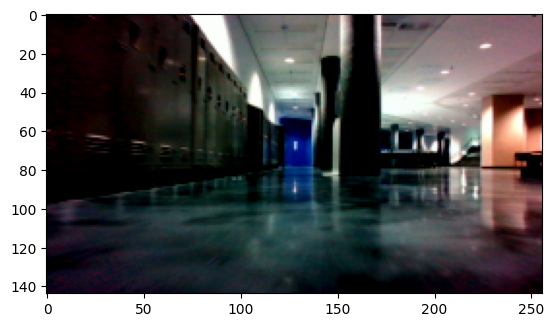

Steering angle tensor shape: torch.Size([5382, 1])
Sim images lenght torch.Size([5382, 3, 144, 256]) and sa torch.Size([5382, 1])
Real images lenght torch.Size([815, 3, 144, 256]) and sa torch.Size([815, 1])


In [6]:
ROOT_DIR = "/homes/iws/cleahw/AirSim_Research/airsim-car-experiments/PythonClient/"

# Specify ratio of real:sim. 1 - sim_ratio = real_ratio
sim_ratio = 0
data_sim_dir = f"{ROOT_DIR}reinforcement_learning/AirSim/"
data_real_dir = f"{ROOT_DIR}reinforcement_learning/balanced_data_split_new"
model_dir = f"{ROOT_DIR}saved_models/sim_model.pth"

batch_size = 2
epochs = 30
learning_rate = 0.0001
momentum = 0.9


# Load data. 

data_real_list = [f"{data_real_dir}"]
data_sim_list = []
data_sim_list =[f"{data_sim_dir}2023-07-20-12-44-49",
                f"{data_sim_dir}2023-07-20-15-11-35",
                f"{data_sim_dir}2023-08-31-12-43-09",
                f"{data_sim_dir}2023-08-31-17-38-56",
                f"{data_sim_dir}2023-08-31-17-46-35",
                f"{data_sim_dir}2023-08-31-17-58-47",
                f"{data_sim_dir}2023-08-31-18-25-48",
                f"{data_sim_dir}2023-08-31-18-38-10",
                f"{data_sim_dir}2023-09-05-10-46-44",
                f"{data_sim_dir}2023-09-05-17-52-22",
                f"{data_sim_dir}2023-09-05-18-15-04",
                f"{data_sim_dir}2023-09-07-11-39-09",
                f"{data_sim_dir}2023-09-08-08-26-58",
                f"{data_sim_dir}2023-09-08-08-33-30",
                f"{data_sim_dir}2023-09-08-08-43-51",
                f"{data_sim_dir}2023-09-08-09-37-12",
                f"{data_sim_dir}2023-09-08-11-44-53",
                f"{data_sim_dir}2023-09-08-11-49-02",
                f"{data_sim_dir}2023-09-08-11-53-42",
                f"{data_sim_dir}2023-09-08-11-55-47",
                f"{data_sim_dir}2023-09-12-10-26-49"
            ]

real_data = load_real_data(data_real_list)
sim_data = load_sim_data(data_sim_list)
print(f"Sim images lenght {sim_data[0].shape} and sa {sim_data[1].shape}")
print(f"Real images lenght {real_data[0].shape} and sa {real_data[1].shape}")